# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

# The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.


In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
#making a copy of original data
df1 = pd.read_csv('gas_turbines.csv')
df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df = df1.copy()
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.value_counts().sum()

15039

In [9]:
df.shape

(15039, 11)

In [10]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [11]:
df.isnull()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15034,False,False,False,False,False,False,False,False,False,False,False
15035,False,False,False,False,False,False,False,False,False,False,False
15036,False,False,False,False,False,False,False,False,False,False,False
15037,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038
AT,6.8594,6.7850,6.8977,7.0569,7.3978,7.6998,7.7901,7.7139,7.7975,8.0820,...,10.4540,10.3050,10.2380,10.3470,10.1550,9.0301,7.8879,7.2647,7.0060,6.9279
AP,1007.9000,1008.4000,1008.8000,1009.2000,1009.7000,1010.7000,1011.6000,1012.7000,1013.8000,1015.0000,...,1004.5000,1004.6000,1004.6000,1004.9000,1005.1000,1005.6000,1005.9000,1006.3000,1006.8000,1007.2000
AH,96.7990,97.1180,95.9390,95.2490,95.1500,92.7080,91.9830,91.3480,90.1960,88.5970,...,98.3880,99.2820,99.9950,100.1700,99.9850,98.4600,99.0930,99.4960,99.0080,97.5330
AFDP,3.5000,3.4998,3.4824,3.4805,3.4976,3.5236,3.5298,3.5088,3.5141,4.0612,...,3.5555,3.5339,3.8805,4.3198,3.7043,3.5421,3.5059,3.4770,3.4486,3.4275
GTEP,19.6630,19.7280,19.7790,19.7920,19.7650,19.6830,19.6590,19.6730,19.6340,23.4060,...,18.9370,18.9090,21.2060,24.0480,19.8370,19.1640,19.4140,19.5300,19.3770,19.3060
TIT,1059.2000,1059.3000,1059.4000,1059.6000,1059.7000,1059.8000,1060.0000,1059.8000,1060.1000,1083.0000,...,1053.4000,1053.3000,1067.5000,1084.3000,1059.7000,1049.7000,1046.3000,1037.7000,1043.2000,1049.9000
TAT,550.0000,550.0000,549.8700,549.9900,549.9800,549.9700,549.8700,549.9200,550.0900,550.2100,...,550.0300,550.0000,550.3200,549.9800,549.9000,546.2100,543.2200,537.3200,541.2400,545.8500
TEY,114.7000,114.7200,114.7100,114.7200,114.7200,114.7200,114.7100,114.7100,114.7200,131.7000,...,110.7800,110.7800,121.2600,133.7400,115.5200,111.6100,111.7800,110.1900,110.7400,111.5800
CDP,10.6050,10.5980,10.6010,10.6060,10.6120,10.6260,10.6440,10.6560,10.6440,11.6790,...,10.3270,10.3280,11.0020,11.6850,10.5700,10.4000,10.4330,10.4830,10.5330,10.5830
CO,3.1547,3.2363,3.2012,3.1923,3.2484,3.4467,3.4874,3.6043,3.3943,1.9081,...,3.6133,3.7118,2.6790,1.3663,3.3792,4.5186,4.8470,7.9632,6.2494,4.9816


In [14]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


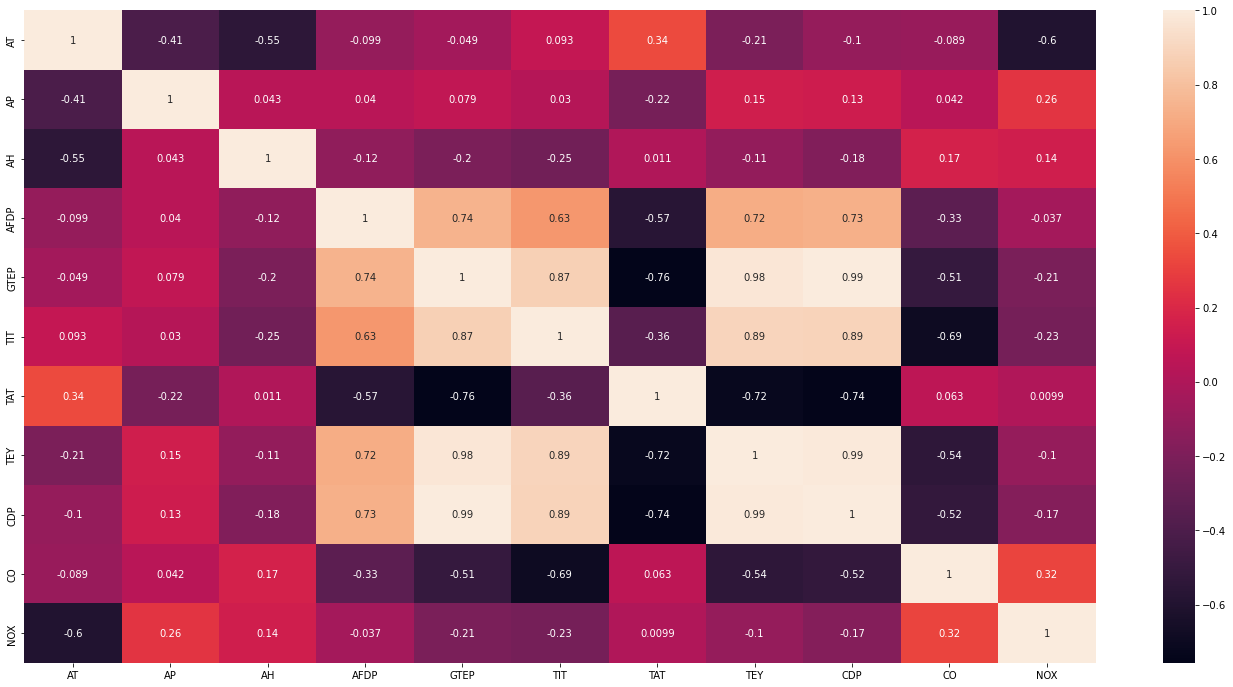

In [15]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

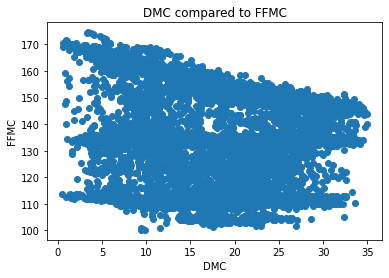

In [17]:
plt.scatter(x = df.AT , y = df.TEY )
plt.xlabel("DMC")
plt.ylabel("FFMC")
plt.title("DMC compared to FFMC")
plt.show()

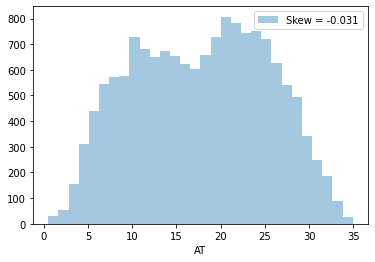

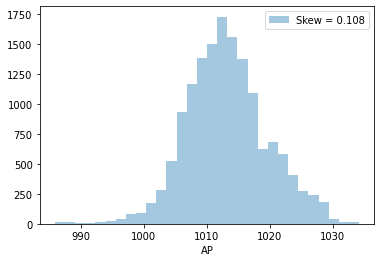

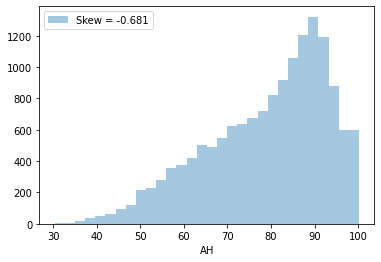

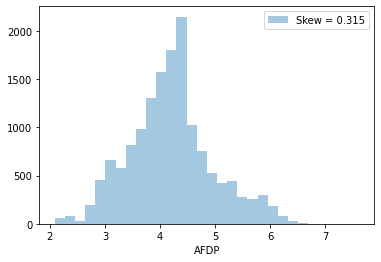

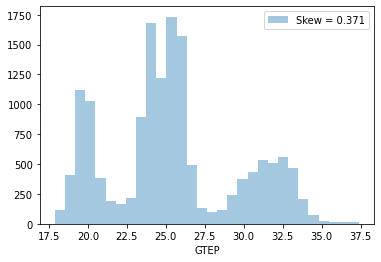

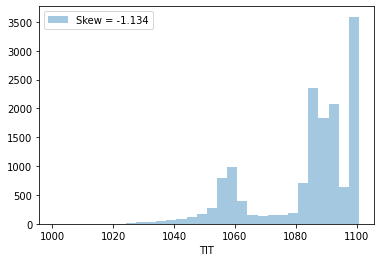

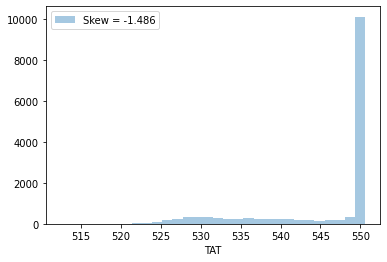

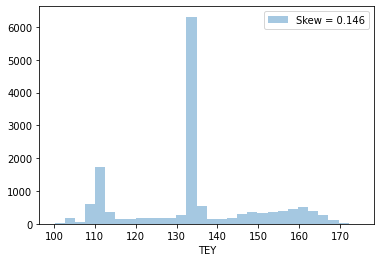

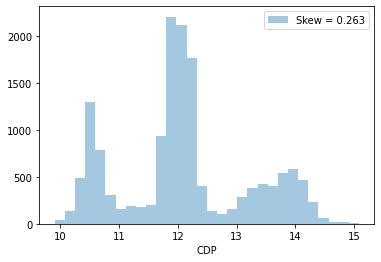

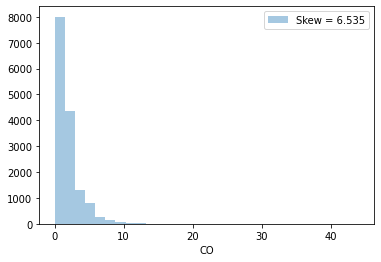

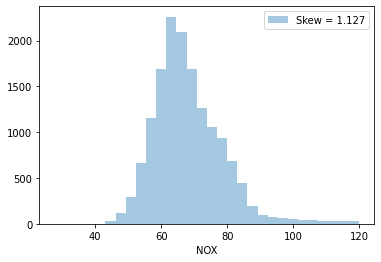

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

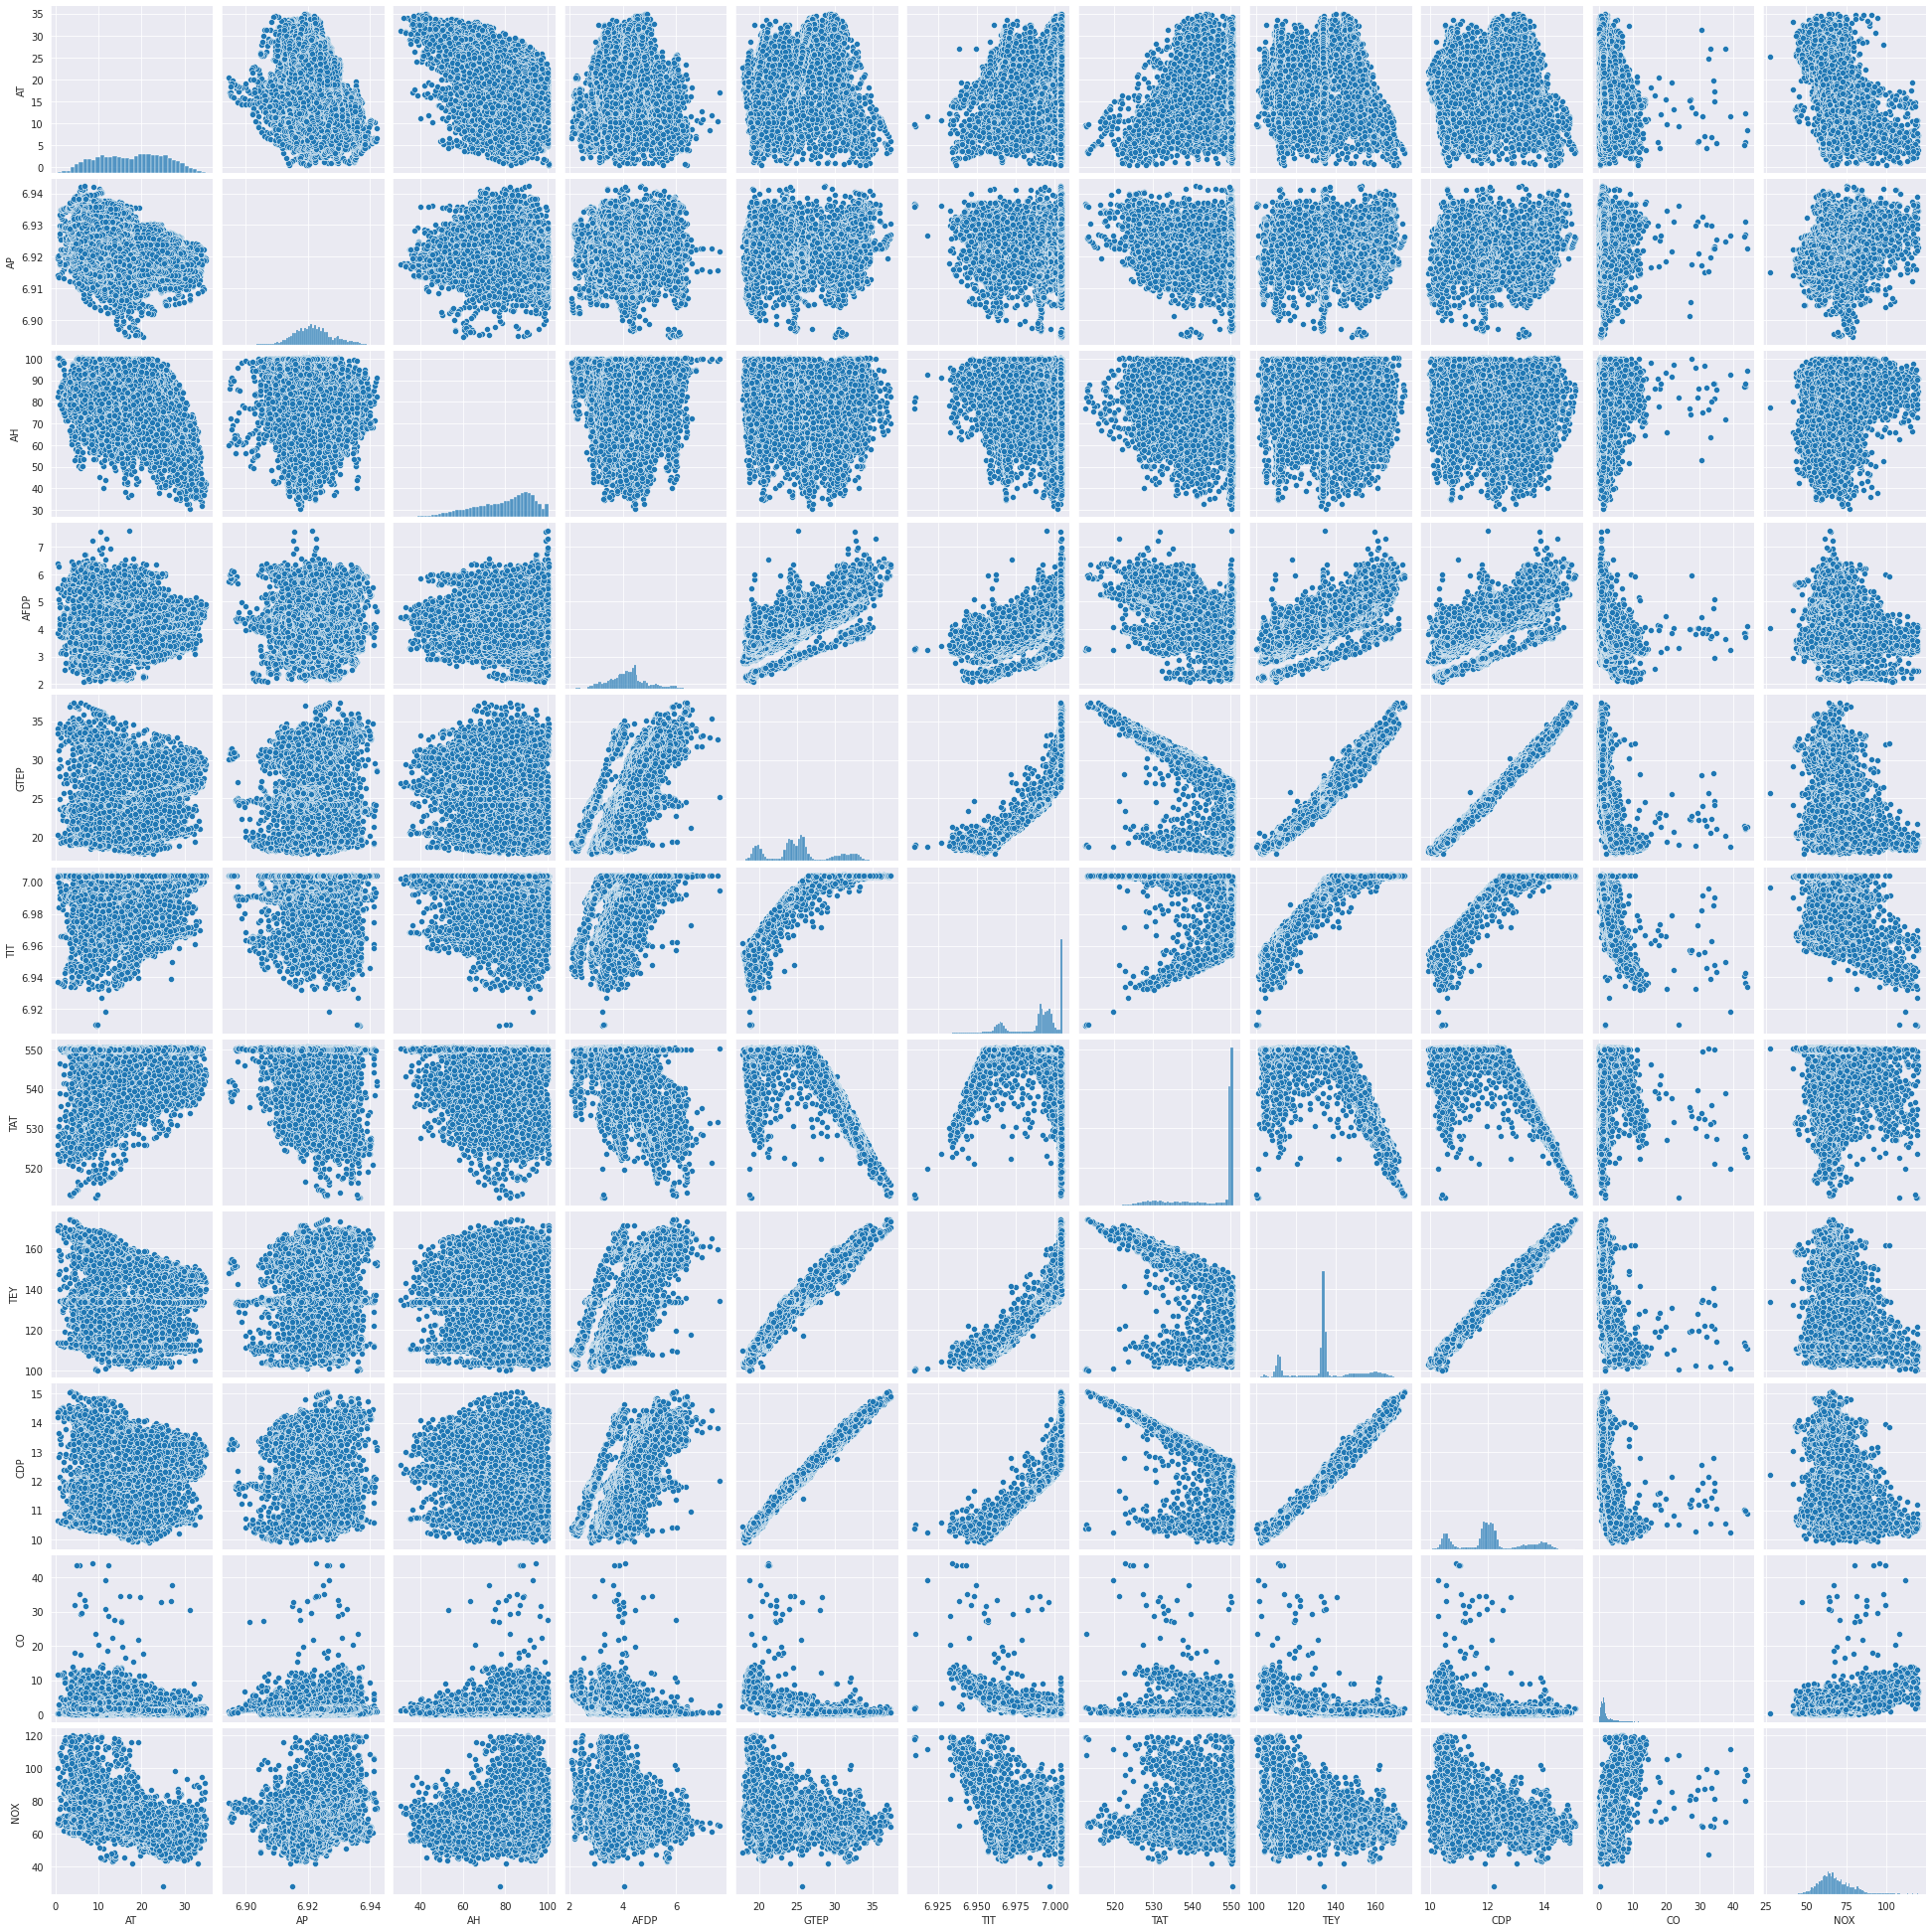

In [30]:
sns.set_style('darkgrid')
sns.pairplot(df)

In [16]:
df['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [17]:
df['TEY'].value_counts().shape

(4207,)

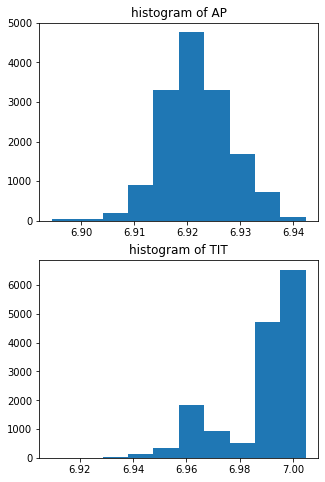

In [18]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['AP', 'TIT']] = df.loc[:, ['AP', 'TIT']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['AP'])
ax[0].title.set_text('histogram of AP')
ax[1].hist(df['TIT'])
ax[1].title.set_text('histogram of TIT')

In [19]:
features = df.drop(['TEY'], axis = 1)
labels = df['TEY'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)

In [20]:
# fitting scaler
sc_features = StandardScaler()

In [21]:
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)

In [22]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)

In [23]:
# labels
y_test = pd.DataFrame(y_test, columns = ['TEY'])
y_train = pd.DataFrame(y_train, columns = ['TEY'])
X_train.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-0.033716,0.341474,-1.652166,-0.840478,-0.162390,0.266592,0.588496,-0.093664,-0.209724,0.493676
1,-0.977256,2.435784,0.402582,2.089732,1.863717,0.986865,-2.167873,1.811513,-0.040102,0.312853
2,-1.163917,0.695038,1.167286,2.713212,2.006948,0.969535,-2.303661,1.810607,-0.591693,0.889764
3,-0.447337,1.170320,0.555479,-2.570886,-1.548396,-1.787436,0.448901,-1.458905,1.199008,-0.108883
4,-0.004874,-1.313956,-1.302624,1.035839,-0.066423,0.272433,0.566922,-0.113595,-0.401906,0.771872


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras

In [25]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=10, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 66        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
# evaluate the model
#scores = model.evaluate(X_train, y_train)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size  = 25, epochs = 500)

In [28]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.000, Valid: 0.000


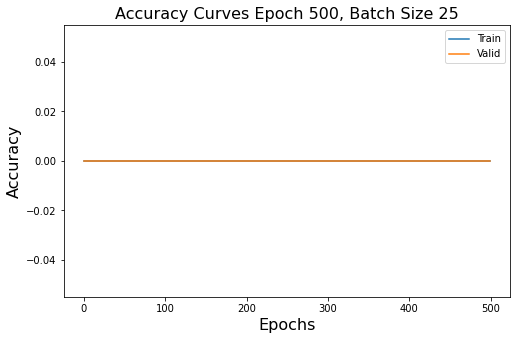

In [29]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 500, Batch Size 25', fontsize=16)
plt.show()